In [17]:
#Create pipeline that will analyze the digitalized data
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import functools as f
from wordcloud import WordCloud
#Preprocessing the data
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

from youtube2text import Youtube2Text
import subprocess
from ibm_watson import SpeechToTextV1
from ibm_watson.websocket import RecognizeCallback, AudioSource
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import pysrt

import os
import speech_recognition as sr
import ffmpeg

MP4 Path TODO

Youtube Path

In [31]:
url = 'https://www.youtube.com/watch?v=bCA54RIkpTo'
command = 'you-get '+url
subprocess.call(command, shell=True)

0

In [32]:
subs = pysrt.open("Black Belt Speech - Lex Fridman.en.srt")

text = ' '
for sub in subs:
    if '[' in sub.text: 
        print('No Good')
    else:
        text = text + ' ' + sub.text + ' '
#print(text)

  so I've learned more in these maths than  I have in all my years I'm a nerd I got  a PhD I learned more about life about  the mind that these masks that I have in  all the years of school and I think two  things two of the biggest things I took  away is the humbling reality that I'm  not special and if you want to be good  at anything you have to work really hard  and if you want to be the best in the  world at something like I do I want to  build robots better than anybody else in  the world or whether that's knitting or  yodeling anything you have to work but  York ever worked harder than anyone else  in the world and the second lesson I  learned I used to compete a lot they  lose a lot and he used to I used to hurt  to lose and I remember I don't know if  the remembers this conversation but I  think it leaked Bluebell I was going to  a big competition and I said you know I  don't know I'm gonna win it's like 15  people division and you said well give  everything you can to win but

Text path

In [3]:
'''
#Input the text of the app
text = "Queen Elizabeth II has died, aged 96.\
The Queen died at her Balmoral estate in Scotland on Thursday 8 September. Her coffin was transported to Edinburgh on Sunday (11 September) where it will lie in state at Holyroodhouse until Tuesday (13 September) when it is trasported to London.Her Majesty will lie in state at Westminster Hall in London from Wednesday (14 September) until her funeral, before being buried alongside her parents and her husband, Prince Philip, in Windsor.\
This follows carefully choreographed schedule which was in place for her death and King Charles III’s succession.When is the Queen’s funeral?\
The Queen’s funeral will be held on Monday19 September which the government announced will be a national bank holiday.\
As per tradtion, the monarch’s funeral generally takes place 10 days after their death, but as the 18 September is a Sunday, it was decided the funeral would take place on the Monday instead.\
In a statement about the funeral and bank holiday released on Saturday (10 September), the government said: “Monday 19 September, the date of Her Majesty Queen Elizabeth II’s State Funeral, will be a national bank holiday.\
“This will allow individuals, businesses and other organisations to pay their respects to Her Majesty and commemorate Her reign, while marking the final day of the period of national mourning.\
“This bank holiday will operate in the same way as other bank holidays, and there is no statutory entitlement to time off. Employers may include bank holidays as part of a worker’s leave entitlement.\
“The bank holiday will take place across the United Kingdom."
'''

NLP script start

In [33]:
polarity = TextBlob(text).sentiment[0]
if polarity < 0: 
    print("Negative sentiment detected")
elif polarity == 0: 
    print("Neutral sentiment detected")
else: 
    print("Postive sentiment detected")

Postive sentiment detected


In [34]:
#Preprocess the data
lemmatizer = WordNetLemmatizer()
#Function to vectorize and lemmatize the data
def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    #Vectorize the data
    # Now just remove any stopwords
    stop = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    #Lemmatize data
    lemma = []
    for lem in stop: 
        lemma.append(lemmatizer.lemmatize(lem, pos = 'v'))
    return lemma

processed_data = text_process(text)

In [35]:
#Function used to create a custom ngram to group words in n-size groups
def ngramconv(sentence,n):
    num = []
    ngram_sentence = ngrams(sentence, n)
    for item in ngram_sentence:
        num.append(item)
    return num

NLP Analysis visuals
Wordcloud


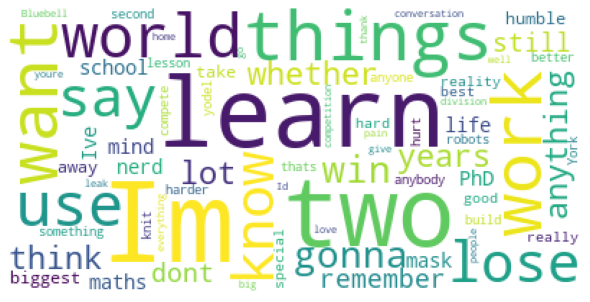

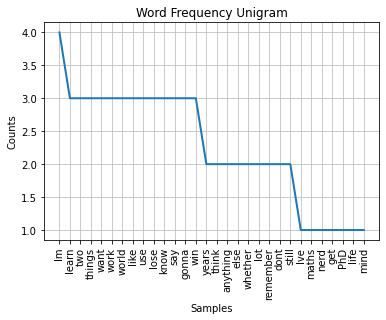

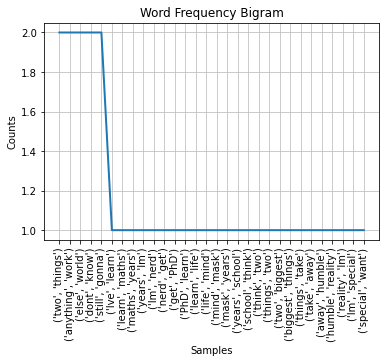

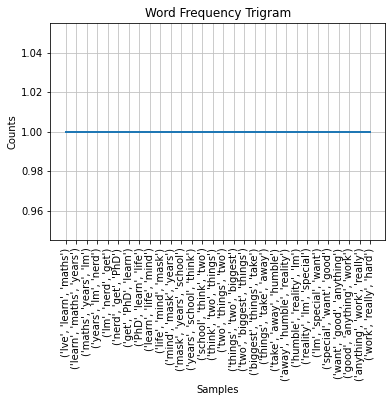

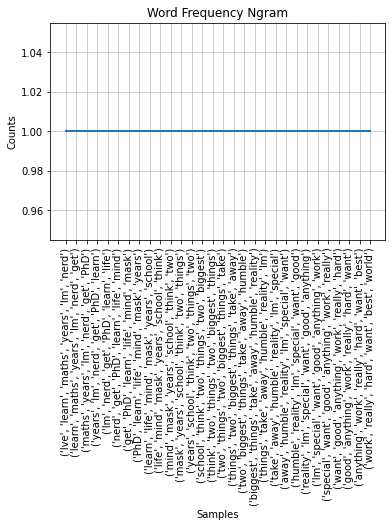

In [36]:
#For Kotkin
print("NLP Analysis visuals")
print("Wordcloud")

#Create one string with all the words used in the comments
wc = f.reduce(lambda x, y: x + ' ' + y, processed_data)

#Generate wordcloud
wordcloud = WordCloud(background_color = 'white').generate(wc)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#Frequency of kotkin words
nlp_words_Kotkin = nltk.FreqDist(processed_data)

#Create unigram, bigram and trigram
plot1 = nlp_words_Kotkin.plot(30, title='Word Frequency Unigram')
bi_kot = list(nltk.bigrams(processed_data))
nlp_words_Kotkin_bi = nltk.FreqDist(bi_kot)
plot_bi = nlp_words_Kotkin_bi.plot(30, title='Word Frequency Bigram')
tri_kot = list(nltk.trigrams(processed_data))
nlp_words_Kotkin_tri = nltk.FreqDist(tri_kot)
plot_tri = nlp_words_Kotkin_tri.plot(30, title='Word Frequency Trigram')

#Let's create a n gram where n = 6
n_kot = ngramconv(processed_data, 6)
nlp_words_Kotkin_n = nltk.FreqDist(n_kot)
plot_n = nlp_words_Kotkin_n.plot(30, title='Word Frequency Ngram')


In [37]:
#Create LDA model, to exract topics
import gensim
from gensim import corpora

In [38]:
df = pd.DataFrame(columns = ['doc'])

In [45]:
df['doc'] = df.apply(lambda x: processed_data, axis = 1)

In [70]:
df['doc'].iloc[0]

['Ive',
 'learn',
 'maths',
 'years',
 'Im',
 'nerd',
 'get',
 'PhD',
 'learn',
 'life',
 'mind',
 'mask',
 'years',
 'school',
 'think',
 'two',
 'things',
 'two',
 'biggest',
 'things',
 'take',
 'away',
 'humble',
 'reality',
 'Im',
 'special',
 'want',
 'good',
 'anything',
 'work',
 'really',
 'hard',
 'want',
 'best',
 'world',
 'something',
 'like',
 'want',
 'build',
 'robots',
 'better',
 'anybody',
 'else',
 'world',
 'whether',
 'thats',
 'knit',
 'yodel',
 'anything',
 'work',
 'York',
 'ever',
 'work',
 'harder',
 'anyone',
 'else',
 'world',
 'second',
 'lesson',
 'learn',
 'use',
 'compete',
 'lot',
 'lose',
 'lot',
 'use',
 'use',
 'hurt',
 'lose',
 'remember',
 'dont',
 'know',
 'remember',
 'conversation',
 'think',
 'leak',
 'Bluebell',
 'go',
 'big',
 'competition',
 'say',
 'know',
 'dont',
 'know',
 'Im',
 'gonna',
 'win',
 'like',
 '15',
 'people',
 'division',
 'say',
 'well',
 'give',
 'everything',
 'win',
 'whether',
 'win',
 'lose',
 'youre',
 'still',
 'gon

In [71]:
dictionary = gensim.corpora.Dictionary(df.iloc[0])

bow_corpus = [dictionary.doc2bow(doc) for doc in df.iloc[0]]

#Running the LDA model
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 1, 
                                   id2word = dictionary,                                    
                                   passes = 100,
                                   workers = 2)

#Printing results       
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

2022-09-23 18:53:26 | INFO | [dictionary.py:201] adding document #0 to Dictionary<0 unique tokens: []>
2022-09-23 18:53:26 | INFO | [dictionary.py:206] built Dictionary<76 unique tokens: ['15', 'Bluebell', 'Id', 'Im', 'Ive']...> from 1 documents (total 114 corpus positions)
2022-09-23 18:53:26 | INFO | [utils.py:448] Dictionary lifecycle event {'msg': "built Dictionary<76 unique tokens: ['15', 'Bluebell', 'Id', 'Im', 'Ive']...> from 1 documents (total 114 corpus positions)", 'datetime': '2022-09-23T18:53:26.398710', 'gensim': '4.2.0', 'python': '3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:57:54) [MSC v.1924 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2022-09-23 18:53:26 | INFO | [ldamodel.py:576] using symmetric alpha at 1.0
2022-09-23 18:53:26 | INFO | [ldamodel.py:576] using symmetric eta at 1.0
2022-09-23 18:53:26 | INFO | [ldamodel.py:481] using serial LDA version on this node
2022-09-23 18:53:26 | INFO | [ldamulticore.py:244] running online LDA t